# Steam Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import missingno as msno

In [2]:
df_steam = pd.read_csv('Popularity_games_Steam_Charts.csv', encoding='latin-1')

In [40]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  int64  
 2   month          83789 non-null  object 
 3   avg            83789 non-null  float64
 4   gain           82529 non-null  float64
 5   peak           83789 non-null  int64  
 6   avg_peak_perc  83789 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [10]:
df_steam.shape

(83789, 7)

In [11]:
df_steam.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [7]:
df_steam.tail()

,gamename,year,month,avg,gain,peak,avg_peak_perc
83784,Steel Division: Normandy 44,2017,July,421.60,-485.13,987,42.7153%
83785,Steel Division: Normandy 44,2017,June,906.74,-231.92,2584,35.0906%
83786,Steel Division: Normandy 44,2017,May,1138.66,415.61,4606,24.7212%
83787,Steel Division: Normandy 44,2017,April,723.05,720.21,1911,37.8362%
83788,Steel Division: Normandy 44,2017,March,2.84,NaN,14,20.2857%


<AxesSubplot:>

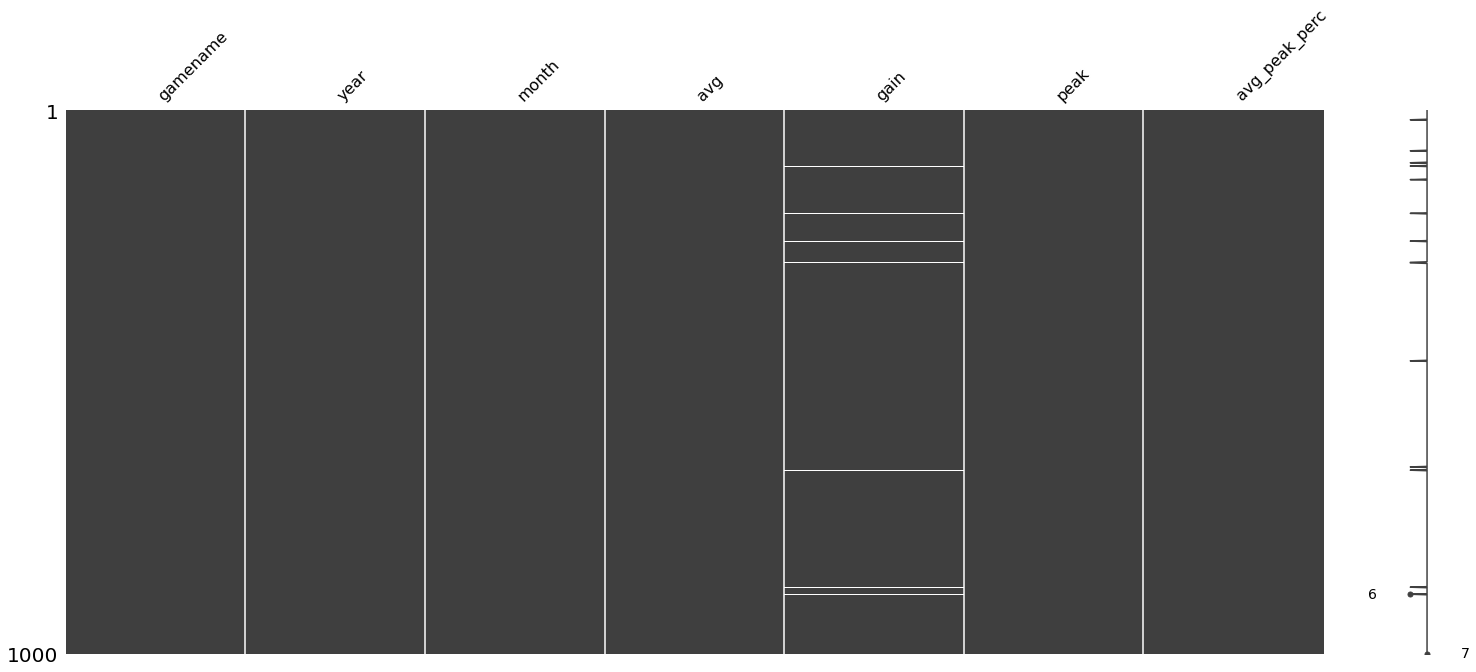

In [25]:
%matplotlib inline
msno.matrix(df_steam.sample(1000))

In [38]:
((df_steam['gain'].isna().sum()/len(df_steam))*100).round(2)

1.5

In [26]:
#Rango de años recogidos en el dataset
year_data = max(df_steam['year'])-min(df_steam['year'])
print("Tenemos datos de %d años" % year_data)

Tenemos datos de 9 años


In [27]:
# Cuantos videojuegos únicos tenemos
unique_vg = df_steam['gamename'].nunique()
print("Tenemos %d videojuegos diferentes en el dataset" % unique_vg)

Tenemos 1260 videojuegos diferentes en el dataset


In [13]:
# Exploramos las columnas y vemos que month contiene espacios
df_steam['month'].unique()

array(['February ', 'January ', 'December ', 'November ', 'October ',
       'September ', 'August ', 'July ', 'June ', 'May ', 'April ',
       'March '], dtype=object)

In [14]:
# Procesamos los espacios en las columnas de meses.
df_steam['month'] = df_steam['month'].str.strip()
df_steam['month']

0        February
1         January
2        December
3        November
4         October
           ...   
83784        July
83785        June
83786         May
83787       April
83788       March
Name: month, Length: 83789, dtype: object

In [15]:
# Unificamos fechas para formatearlas en una columna de tipo date
df_steam['date'] = pd.to_datetime(df_steam['month'] + df_steam['year'].astype(str), format='%B%Y')
df_steam['date']

0       2021-02-01
1       2021-01-01
2       2020-12-01
3       2020-11-01
4       2020-10-01
           ...    
83784   2017-07-01
83785   2017-06-01
83786   2017-05-01
83787   2017-04-01
83788   2017-03-01
Name: date, Length: 83789, dtype: datetime64[ns]

In [16]:
df_steam.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,date
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,2021-02-01
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%,2021-01-01
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%,2020-12-01
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%,2020-11-01
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%,2020-10-01


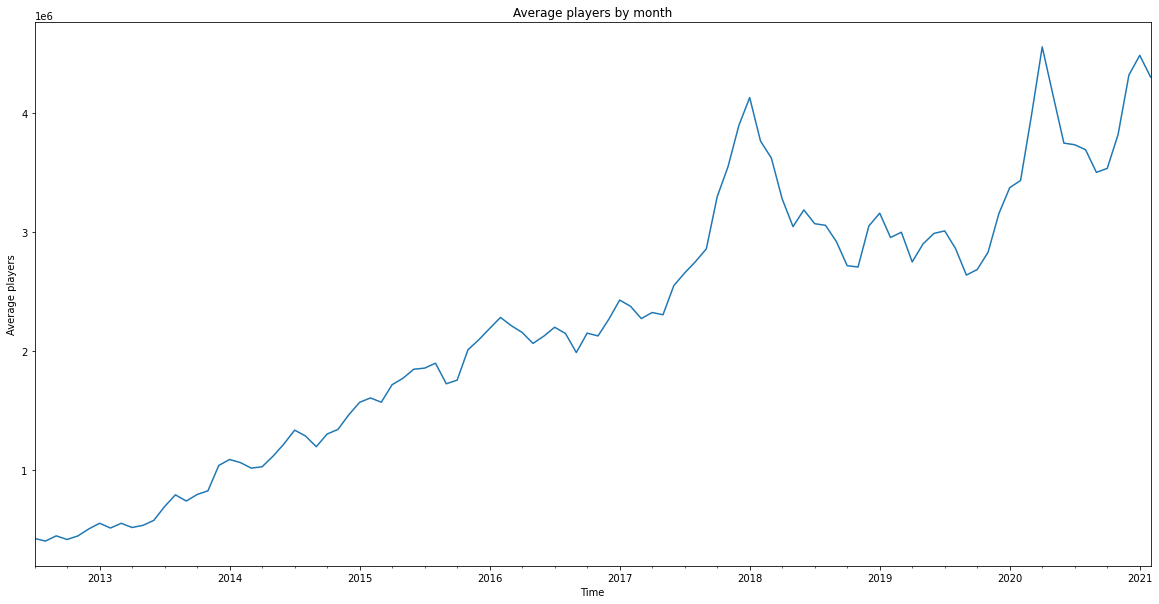

In [32]:
#Evolución del número de jugadores medio en la plataforma steam
df_steam_year = df_steam.groupby(['date'])['avg'].sum().plot(figsize=(20,10))
plt.title("Average players by month")
plt.xlabel("Time")
plt.ylabel("Average players");

### Top 10 juegos más jugados en Steam en los últimos 10 años

In [3]:
df_steam_games = df_steam.groupby(['gamename'])['avg'].sum().reset_index()

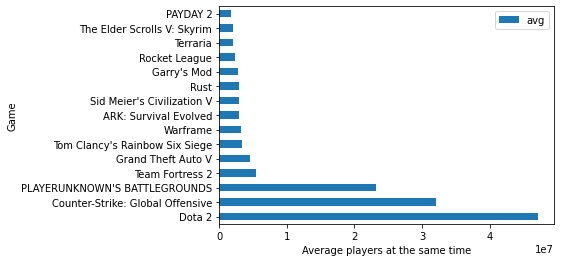

In [4]:
df_steam_games.sort_values('avg', ascending=False).head(15).plot(kind='barh', y='avg', x='gamename')
plt.xlabel("Average players at the same time")
plt.ylabel("Game");

### Top 10 juegos más jugados en Steam en los últimos 2 años

In [18]:
df_top_games_covid = df_steam.loc[(df_steam['year'].isin([2020, 2021]))]

In [19]:
df_top_games_covid.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,date
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,2021-02-01
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%,2021-01-01
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%,2020-12-01
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%,2020-11-01
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%,2020-10-01


In [20]:
#Rango de años recogidos en el dataset
year_data = max(df_top_games_covid['year'])-min(df_top_games_covid['year'])
print("Tenemos datos de %d año" % year_data)

Tenemos datos de 1 año


In [32]:
df_games_covid19 = df_top_games_covid.groupby(['gamename'])['avg'].sum().reset_index()
df_games_covid19.head()

,gamename,avg
0,100% Orange Juice,5218.48
1,12 is Better Than 6,88.83
2,140,42.45
3,60 Seconds!,484.82
4,7 Days to Die,274368.68


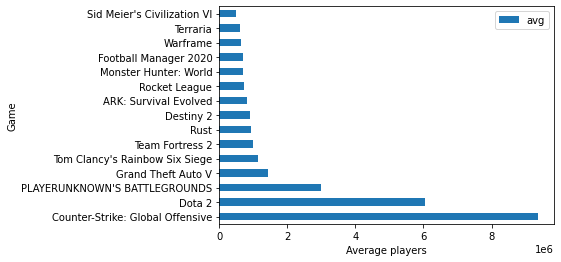

In [34]:
df_top10_games_covid19 = df_games_covid19.sort_values('avg', ascending=False).head(15).plot(kind='barh', y='avg', x='gamename')
plt.xlabel("Average players")
plt.ylabel("Game");